<h1 align=center> Computer Vision: Assignment 2 </h1>

| [<img src="https://avatars0.githubusercontent.com/u/18689888" width="150px;" height="150px;"/><br /><sub><b>Amr M. Kayid</b></sub>](https://github.com/AmrMKayid)| [<img src="https://avatars2.githubusercontent.com/u/15708438" width="150px;" height="150px;"/><br /><sub><b>Abdullah ELkady</b></sub>](https://github.com/AbdullahKady) |
| :---: | :---: | 
| **37-15594** | **37-16401** |
| **T10** | **T10** |

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import math
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.cm as cm
import sys
import pylab
from matplotlib.widgets import Slider

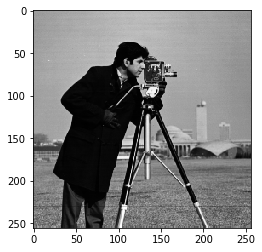

In [3]:
cameraman_img = Image.open("Cameraman.tif")
plt.imshow(cameraman_img, cmap="gray")

# Problem 1


Implement a function to compute the **Laplacian of Gaussian (LoG) kernel** given the value of sigma (𝜎). 

Deliverables:
- Your code.
- The output edge image for 𝜎 = 2, 𝜎 = 3 and 𝜎 = 4. Name the edge images “LoG_2.jpg”, “Log_3.jpg” and “Log_4.jpg”. The treshold for all cases should be set to 0.1.

First, you are asked to compute the size of the kernel as per the following equation:
\begin{equation}
s=2 \times\lceil 3 \times \sigma\rceil+ 1
\end{equation}

In [4]:
def compute_kernel_size(sigma: str) -> int:
    return int((2 * np.ceil(3 * sigma)) + 1)

Given the size of the kernel (𝑠 × 𝑠), implement a function to compute the values inside as per the following function ([0,0] is the middle cell):
\begin{equation}
\operatorname{LoG}(x, y)=\frac{-1}{\pi \sigma^{4}}\left(1-\frac{x^{2}+y^{2}}{2 \sigma^{2}}\right) e^{-\frac{x^{2}+y^{2}}{2 \sigma^{2}}}
\end{equation}

In [5]:
def lap_of_gaussian(x: float, y: float, sigma: float) -> float:
    n1 = (-1. / (math.pi * sigma**4))
    common = (x**2 + y**2) / (2 * sigma**2)
    n2 = (1. - common)
    n3 = math.exp(-common)
    return n1 * n2 * n3

In [6]:
range_inc = lambda start, end: range(start, end+1)

In [7]:
def compute_log_mask(sigma: float) -> np.ndarray:
    mask_width = compute_kernel_size(sigma)
    
    log_mask = []
    w_range = int(math.floor(mask_width / 2.))
    print('Going from {} to range {}'.format(-w_range, w_range))
    for x in range_inc(-w_range, w_range):
        for y in range_inc(-w_range, w_range):
            log_mask.append(lap_of_gaussian(x, y, sigma))
            
    log_mask = np.array(log_mask)
    log_mask = log_mask.reshape(mask_width, mask_width)
    return log_mask

In [8]:
def convolve(image, mask):
    image = np.array(image)
    width = image.shape[1]
    height = image.shape[0]
    w_range = int(math.floor(mask.shape[0] / 2.))
    
    res_image = np.zeros((height, width))

    # Iterate over every pixel that can be covered by the mask
    for i in range(w_range, width-w_range):
        for j in range(w_range, height-w_range):
            # Then convolute with the mask 
            for k in range_inc(-w_range, w_range):
                for h in range_inc(-w_range,w_range):
                    res_image[j, i] += mask[w_range + h,w_range+k] * image[j + h, i + k]
    return res_image

In [9]:
# Find the zero crossing in the log_image
def zero_crossing_test(log_image):
    z_c_image = np.zeros(log_image.shape)

    # Check the sign (negative or positive) of all the pixels around each pixel
    for i in range(1, log_image.shape[0]-1):
        for j in range(1, log_image.shape[1]-1):
            neg_count, pos_count = 0, 0
            
            for a in range_inc(-1, 1):
                for b in range_inc(-1,1):
                    if(a != 0 and b != 0):
                        if(log_image[i+a,j+b] < 0):
                            neg_count += 1
                        elif(log_image[i+a,j+b] > 0):
                            pos_count += 1

            # If all the signs around the pixel are the same and they're not all zero, 
            # then it's not a zero crossing and not an edge. 
            # Otherwise, copy it to the edge map.
            z_c = ( (neg_count > 0) and (pos_count > 0) )
            if(z_c):
                z_c_image[i, j] = 1

    return z_c_image

In [10]:
def run_log_edge_detection(image, sigma, threshold):
    print("creating mask")
    log_mask = compute_log_mask(sigma)
    
    # Smooth the image by convolving with the LoG mask
    print("smoothing")
    log_image = convolve(image, log_mask)

    fig = plt.figure()
    # Display the smoothed imgage
    blurred = fig.add_subplot(1,4,2)
    blurred.imshow(log_image, cmap=cm.gray)

    # Find the zero crossings
    print("finding zero crossings")
    z_c_image = zero_crossing_test(log_image)
    print(z_c_image)

    #Display the zero crossings
    edges = fig.add_subplot(1,4,3)
    edges.imshow(z_c_image, cmap=cm.gray)
    
    print("displaying")
    pylab.show()
    print('done updating')
    return log_image, z_c_image

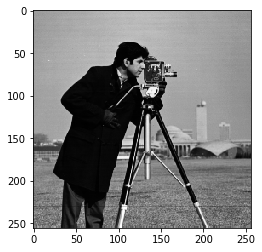

In [11]:
cameraman_img = Image.open("Cameraman.tif")
plt.imshow(cameraman_img, cmap="gray")

creating mask
Going from -6 to range 6
smoothing
finding zero crossings
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
displaying


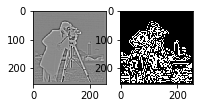

done updating


In [12]:
log_image, z_c_image = run_log_edge_detection(cameraman_img, 2, 0.1)

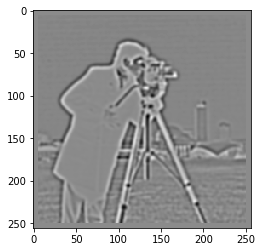

In [13]:
plt.imshow(log_image, cmap="gray")

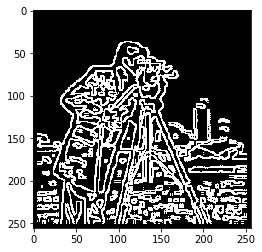

In [14]:
plt.imshow(z_c_image, cmap="gray")

creating mask
Going from -9 to range 9
smoothing
finding zero crossings
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
displaying


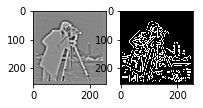

done updating


In [15]:
log_image, z_c_image = run_log_edge_detection(cameraman_img, 3, 0.1)

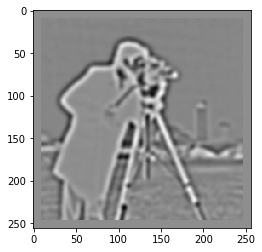

In [16]:
plt.imshow(log_image, cmap="gray")

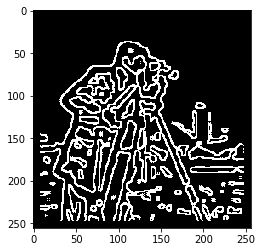

In [17]:
plt.imshow(z_c_image, cmap="gray")

creating mask
Going from -12 to range 12
smoothing
finding zero crossings
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
displaying


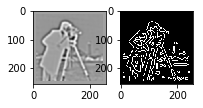

done updating


In [18]:
log_image, z_c_image = run_log_edge_detection(cameraman_img, 4, 0.1)

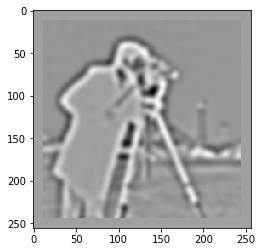

In [19]:
plt.imshow(log_image, cmap="gray")

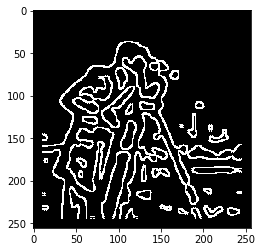

In [20]:
plt.imshow(z_c_image, cmap="gray")

# Problem 2


Implement a function to sharpen a gray-scale image as per the discussion provided in the tutorial. As a possible kernel for edge detection, consider the kernel provided below. Apply your function to the image “cameraman.tif”.

\begin{equation}
M=\left[\begin{array}{ccc}{-1} & {-1} & {-1} \\ {-1} & {8} & {-1} \\ {-1} & {-1} & {-1}\end{array}\right]
\end{equation}

Deliverables:
- Your code.
- The sharpened output image. Name the image “Sharpened.jpg”

In [21]:
def apply_sharpening_kernel(image, row, col):
    """
    -1  -1  -1
    -1   8  -1
    -1  -1  -1
    """
    # Is this some terrible code? YES IT IS!
    new_value = 0

    new_value += -1 * image[row-1][col-1]
    new_value += -1 * image[row-1][col]
    new_value += -1 * image[row][col-1]

    new_value += 8 * image[row][col]

    new_value += -1 * image[row+1][col]
    new_value += -1 * image[row][col+1]
    new_value += -1 * image[row+1][col+1]

    return new_value

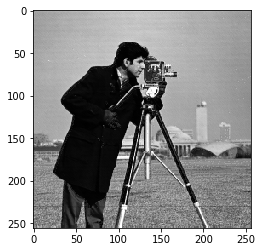

In [22]:
original_image = np.array(cameraman_img)
sharpening_layer = np.copy(original_image)
padded_image = np.pad(original_image, pad_width=1)

# A simple convolution, with zero padding.
for r, row in enumerate(original_image):
    for c, _ in enumerate(row):
        sharpening_layer[r][c] = apply_sharpening_kernel(padded_image, r, c)

output_sharpened = 0.1 * sharpening_layer + original_image
# Apply threshold so that the ranges stay within 0-255
output_sharpened[output_sharpened > 255] = 255
output_sharpened[output_sharpened < 0] = 0

plt.imshow(output_sharpened, cmap=cm.gray)